In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from functools import cmp_to_key
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import time

import warnings
warnings.filterwarnings('ignore')

In [3]:
solar_data=pd.read_csv('solarpowergeneration.csv')
solar_data.head().style.background_gradient(cmap='rainbow')

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
0,0.859897,69,28,7.500000,0,10.000000,75,8.000000,29.820000,0
1,0.628535,69,28,7.500000,0,10.000000,77,5.000000,29.850000,0
2,0.397172,69,28,7.500000,0,10.000000,70,0.000000,29.890000,5418
3,0.165810,69,28,7.500000,0,10.000000,33,0.000000,29.910000,25477
4,0.065553,69,28,7.500000,0,10.000000,21,3.000000,29.890000,30069


In [4]:
solar_data.shape

(2920, 10)

In [5]:
solar_data.corr()['power-generated'].sort_values(ascending=False).to_frame()

,power-generated
power-generated,1.000000
average-wind-speed-(period),0.278174
wind-direction,0.146788
wind-speed,0.142641
temperature,0.132193
visibility,0.076536
average-pressure-(period),-0.036771
sky-cover,-0.187236
humidity,-0.522545
distance-to-solar-noon,-0.746681


In [6]:
solar_data_new = solar_data.iloc[0:24 , 0:10]
solar_data_new

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
0,0.859897,69,28,7.5,0,10.0,75,8.0,29.82,0
1,0.628535,69,28,7.5,0,10.0,77,5.0,29.85,0
2,0.397172,69,28,7.5,0,10.0,70,0.0,29.89,5418
3,0.165810,69,28,7.5,0,10.0,33,0.0,29.91,25477
4,0.065553,69,28,7.5,0,10.0,21,3.0,29.89,30069
5,0.296915,69,28,7.5,0,10.0,20,23.0,29.85,16280
6,0.528278,69,28,7.5,0,10.0,36,15.0,29.83,515
7,0.759640,69,28,7.5,0,10.0,49,6.0,29.86,0
8,0.862113,72,29,6.8,0,10.0,67,6.0,29.86,0
9,0.630155,72,29,6.8,0,10.0,49,0.0,29.87,0


In [7]:
def plot(variable):
    plt.figure(figsize=(15,5))
    plt.plot(solar_data_new[variable])
    plt.xlabel(variable)
    plt.ylabel("frequency")
    plt.title("{} distribution with plot ".format(variable)) 

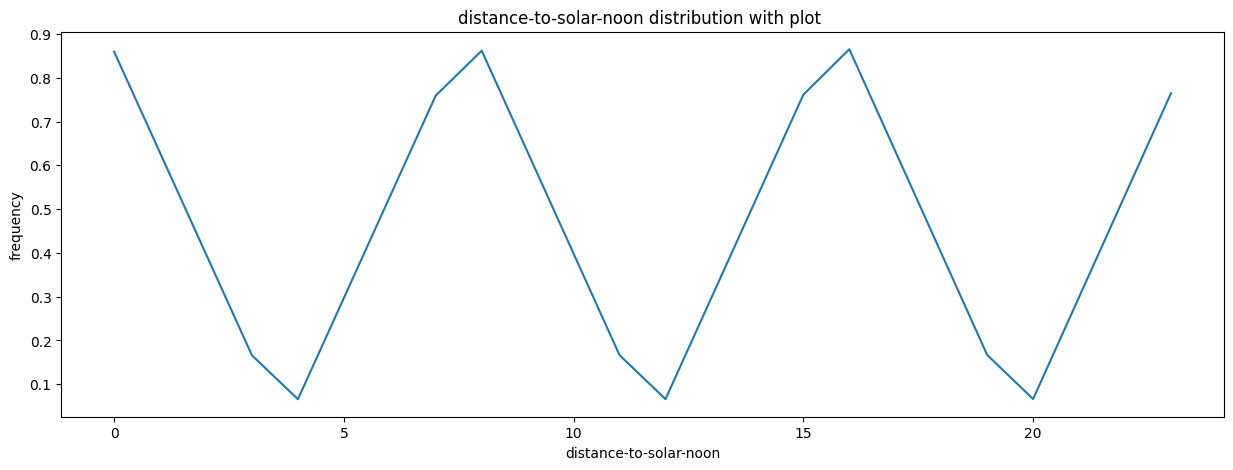

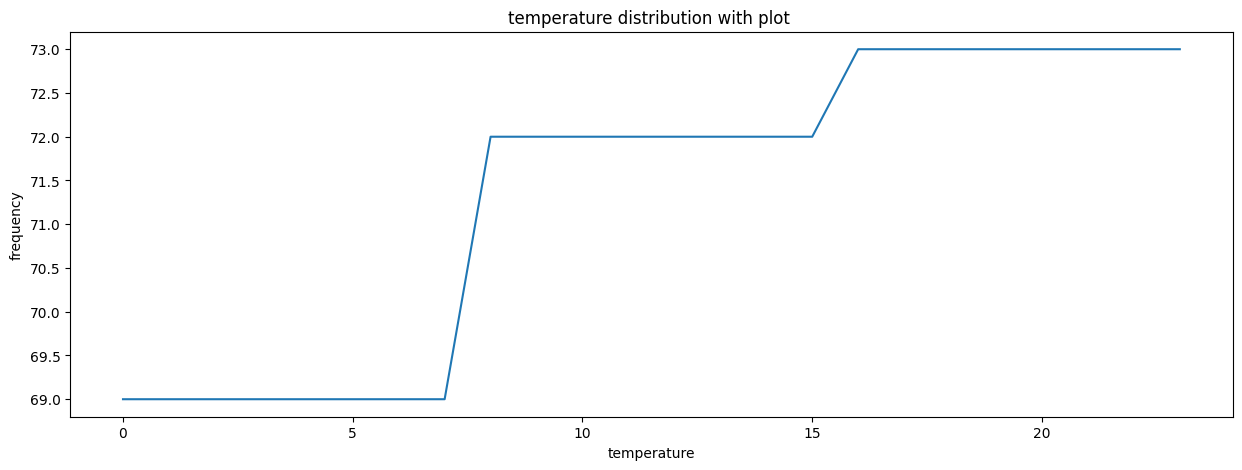

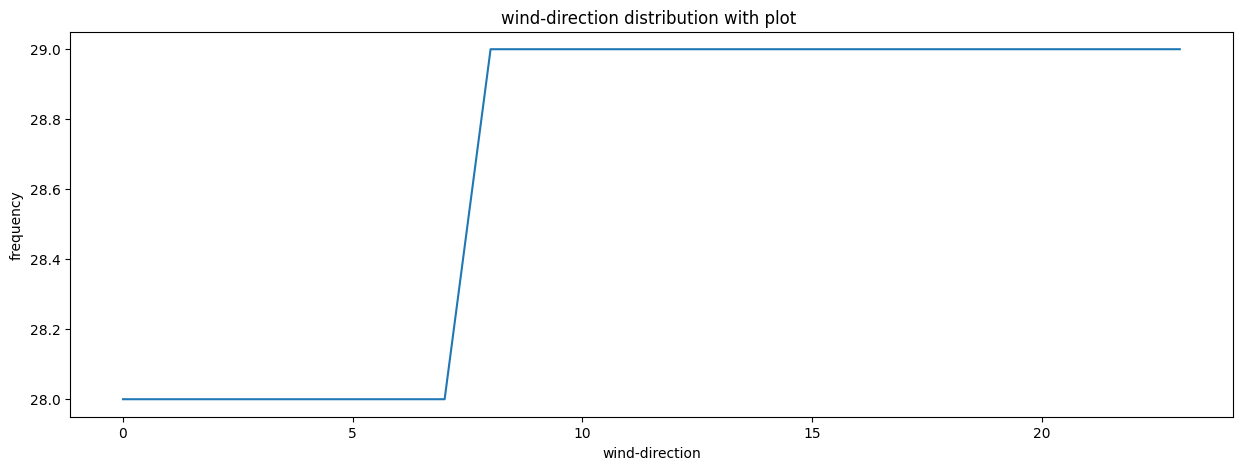

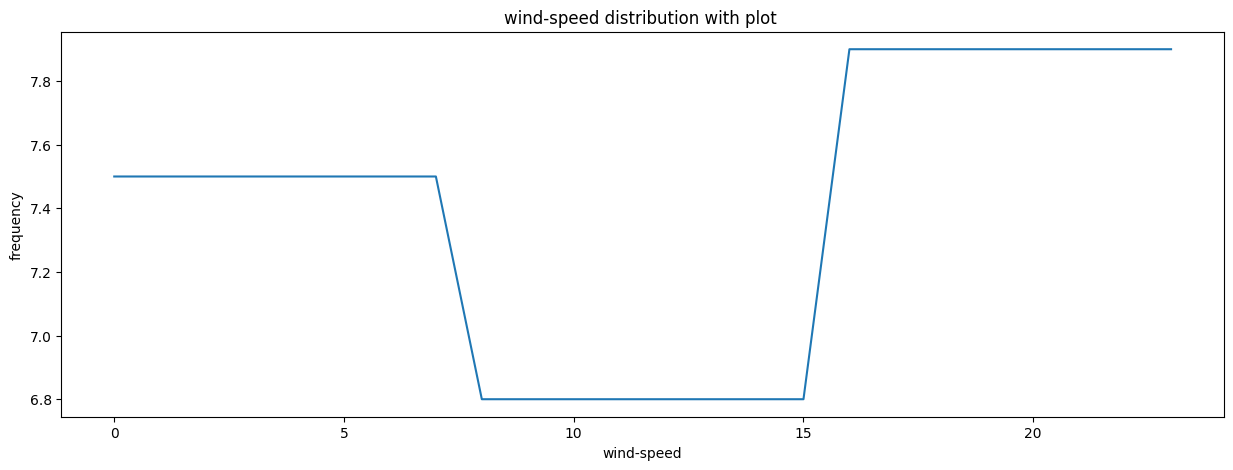

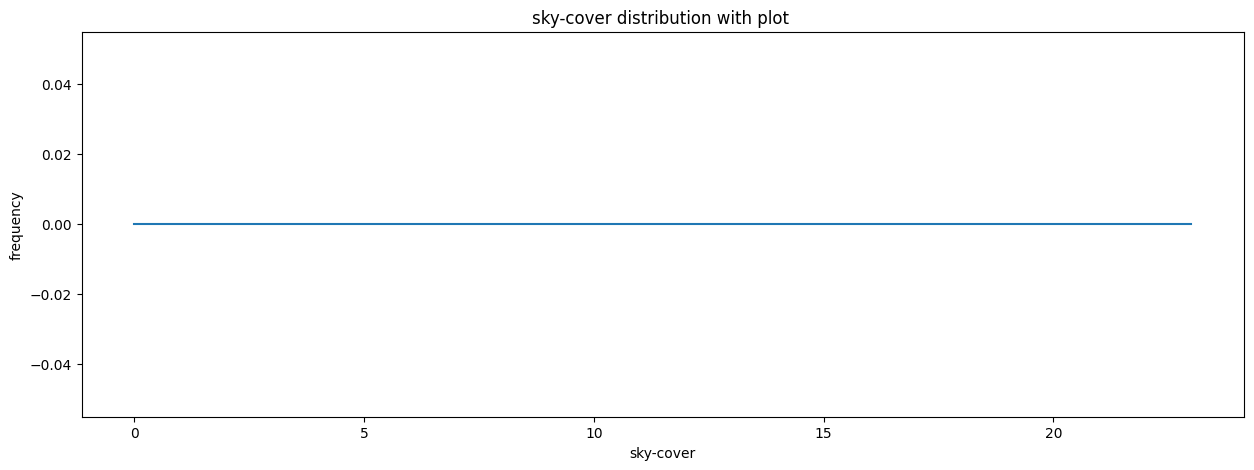

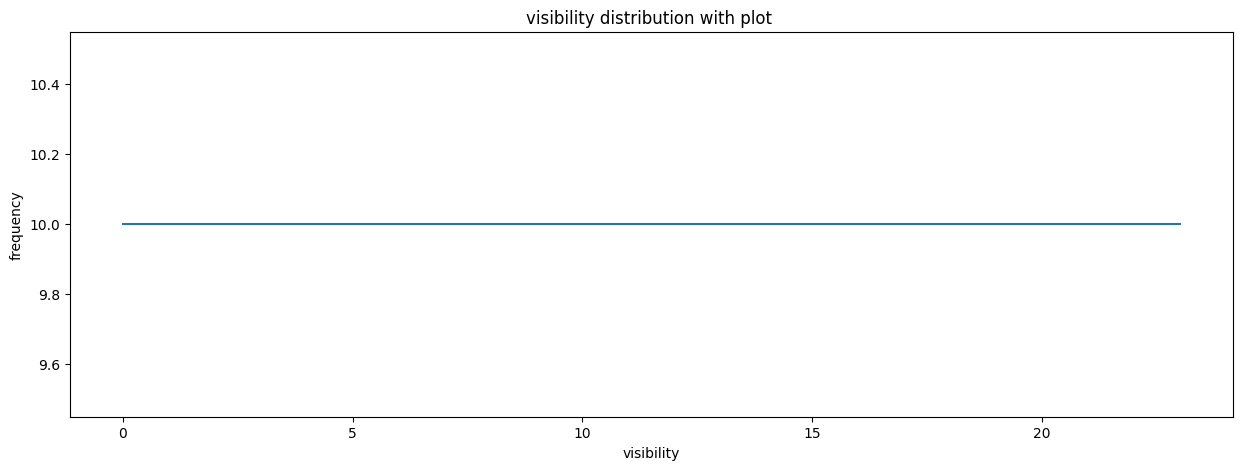

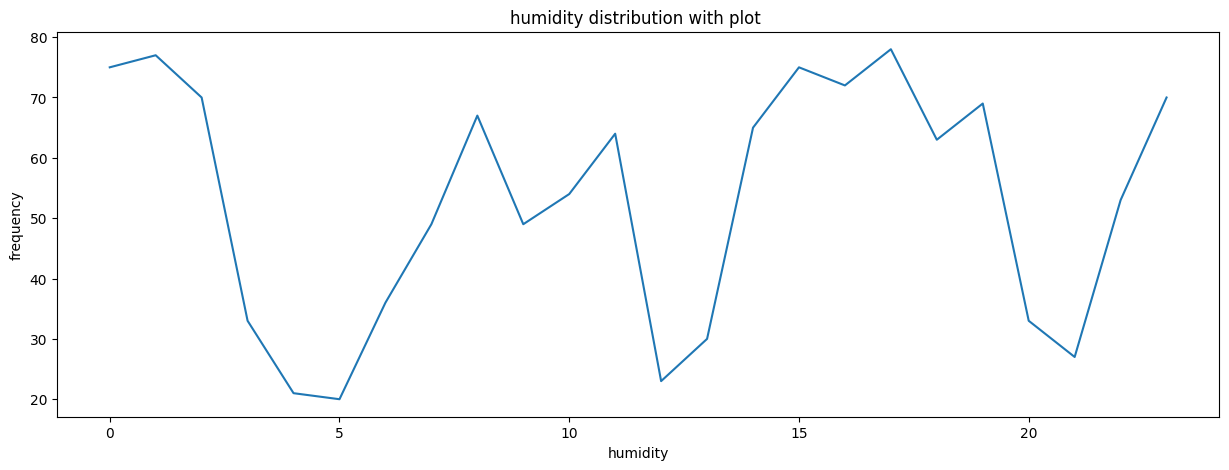

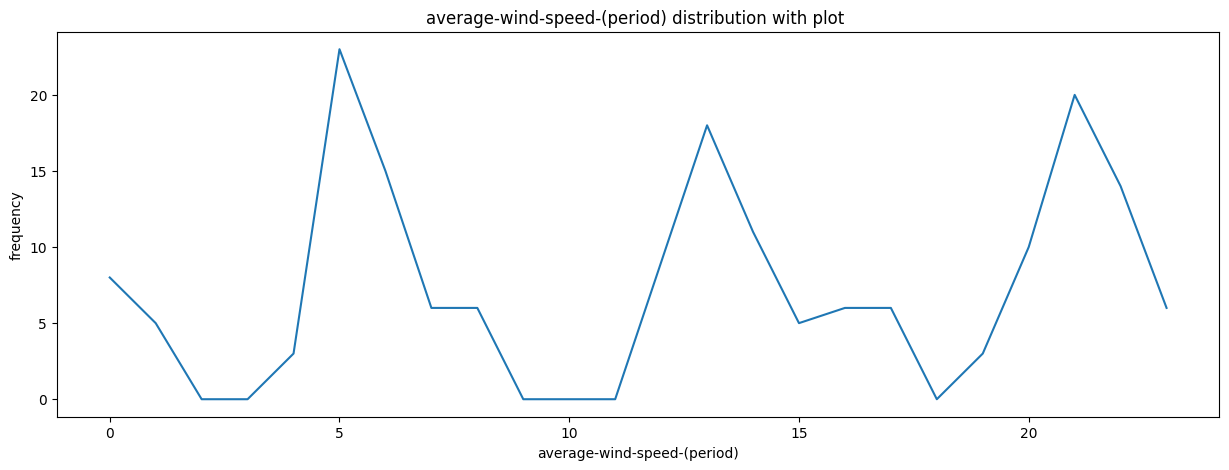

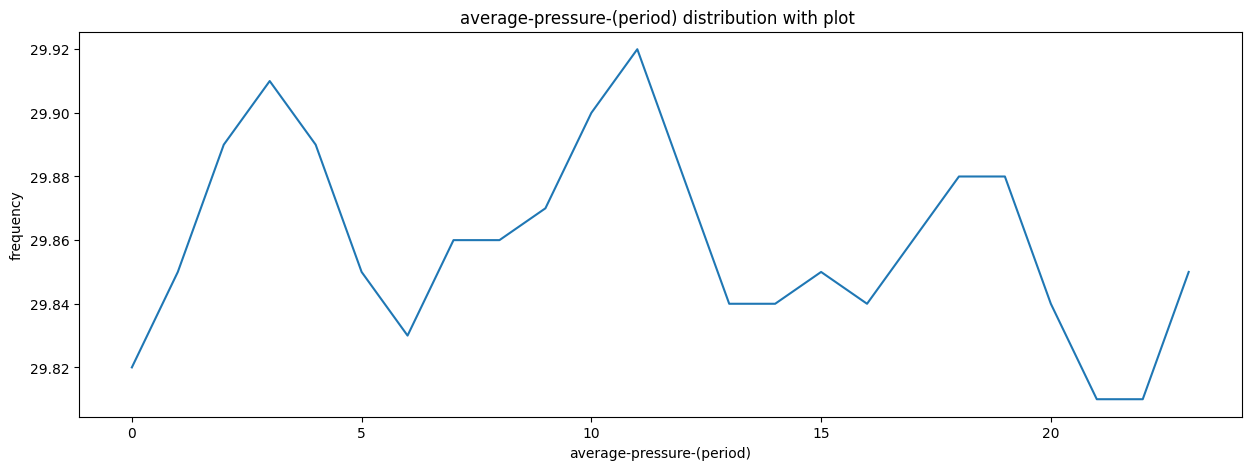

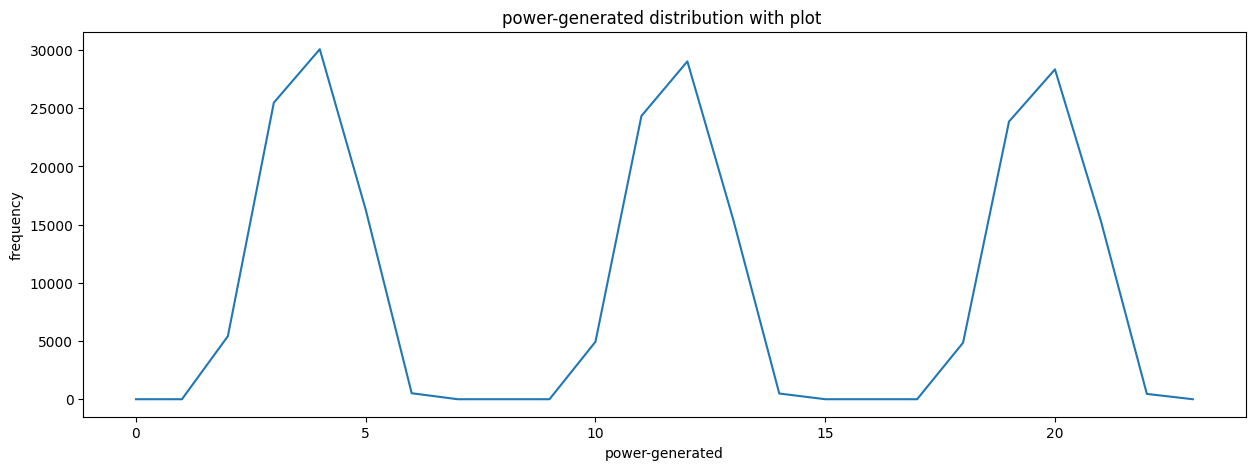

In [8]:
numerical_columns = solar_data.select_dtypes(include=[np.number]).columns
for num in numerical_columns:
    plot(num)
plt.show()

In [9]:
def plot_hist(variable):
    plt.figure(figsize=(15,5))
    sns.histplot(solar_data_new[variable], kde=True, color='purple')
    plt.xlabel(variable)
    plt.ylabel("frequency")
    plt.axvline(solar_data_new[variable].mean(), color='r', linestyle='dashed', linewidth=2)
    plt.title("{} distribution with hist ".format(variable))
    plt.show()

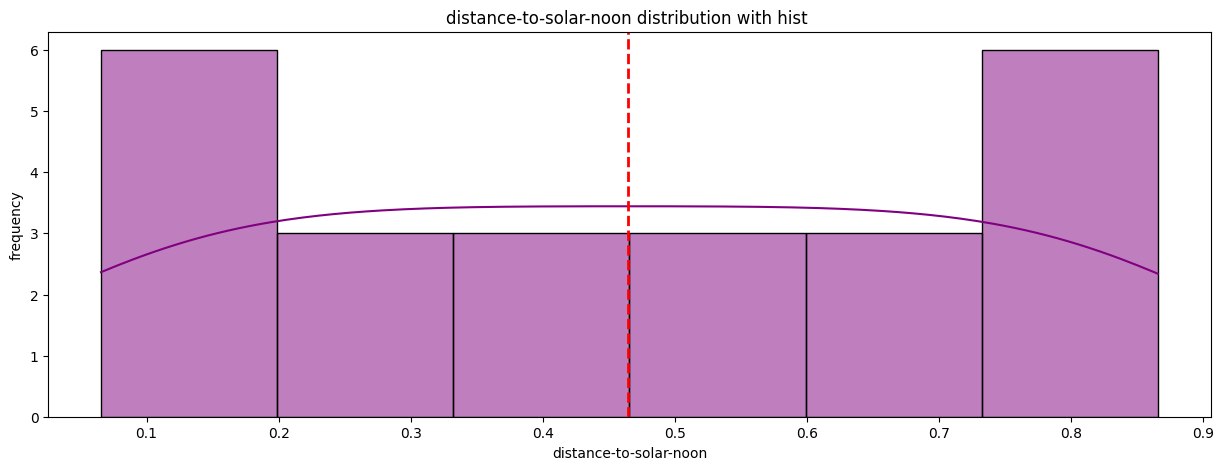

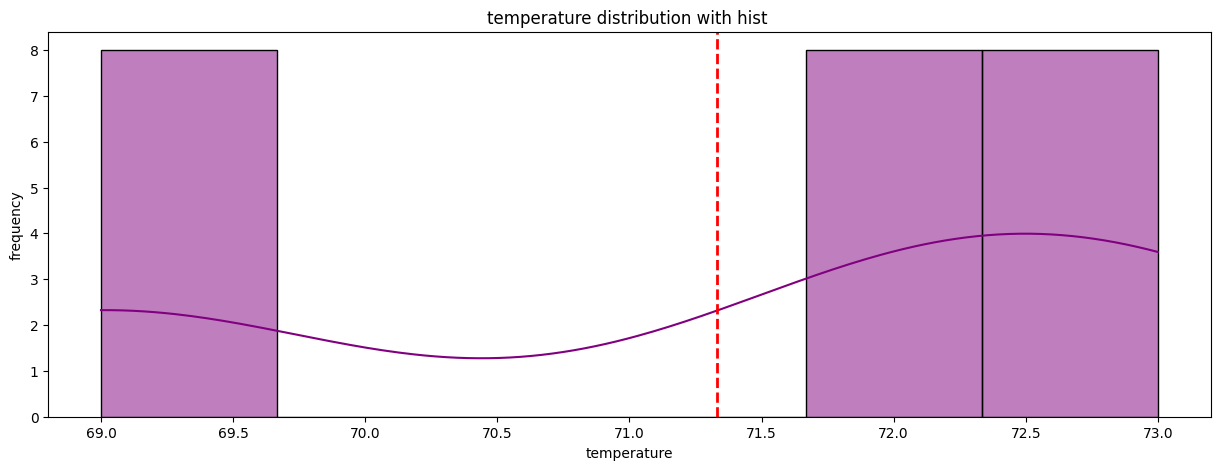

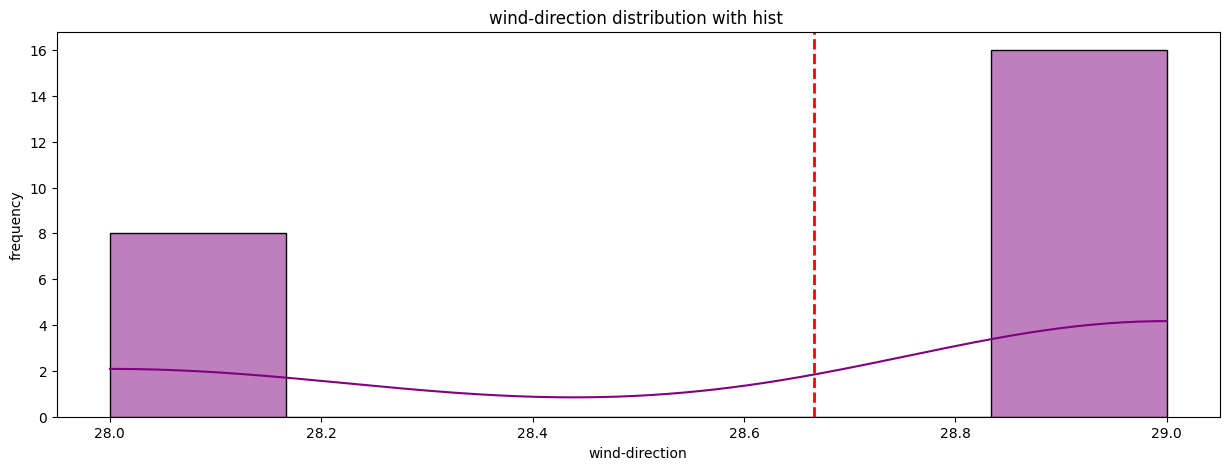

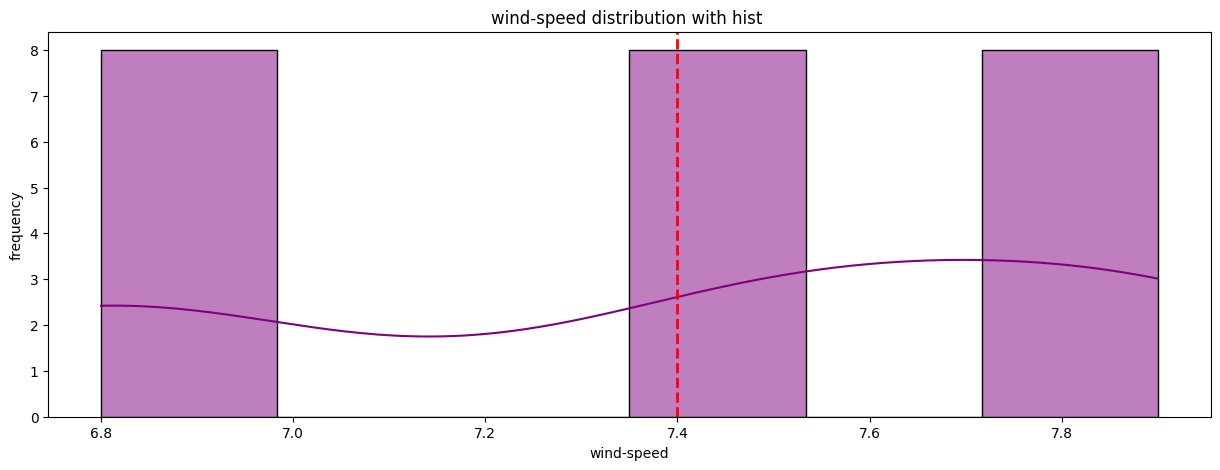

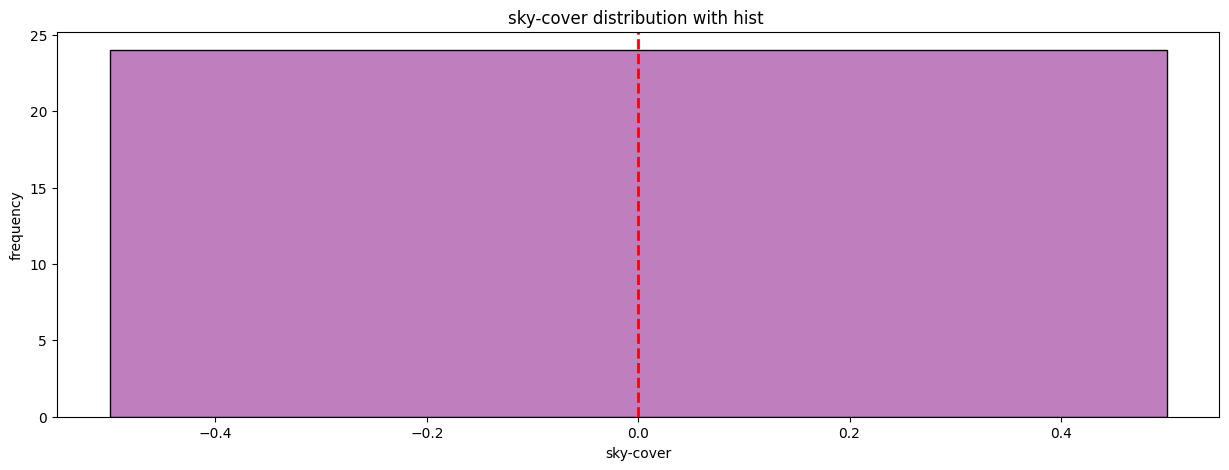

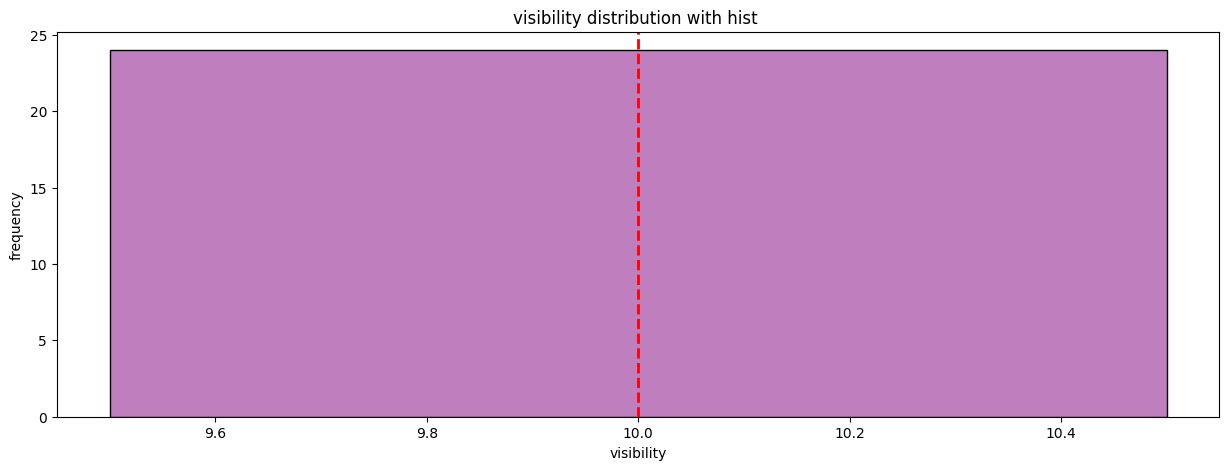

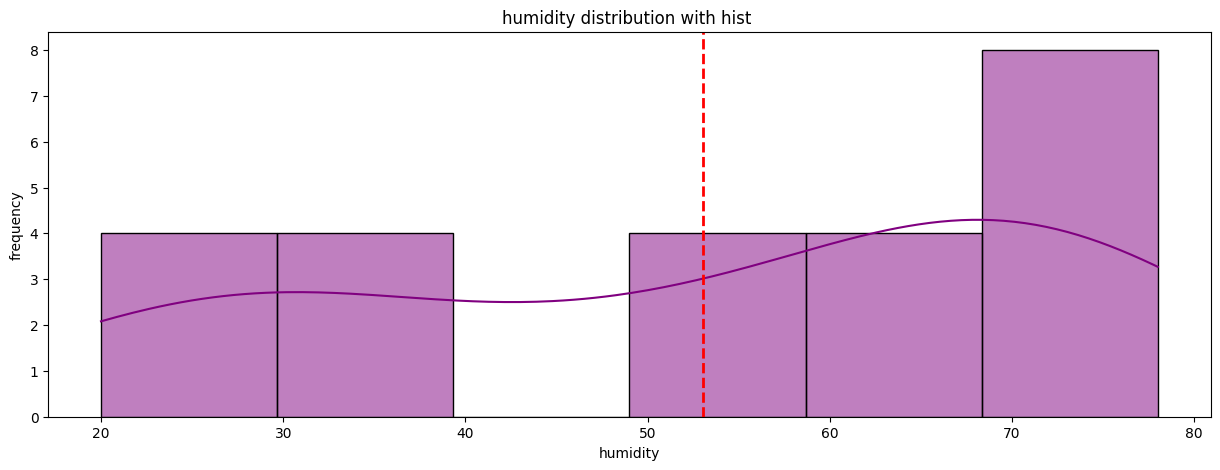

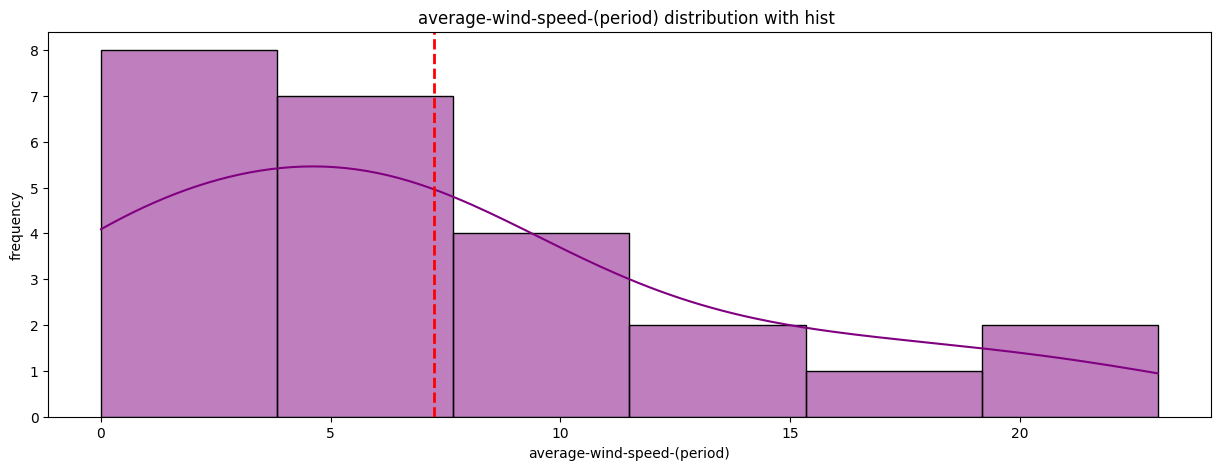

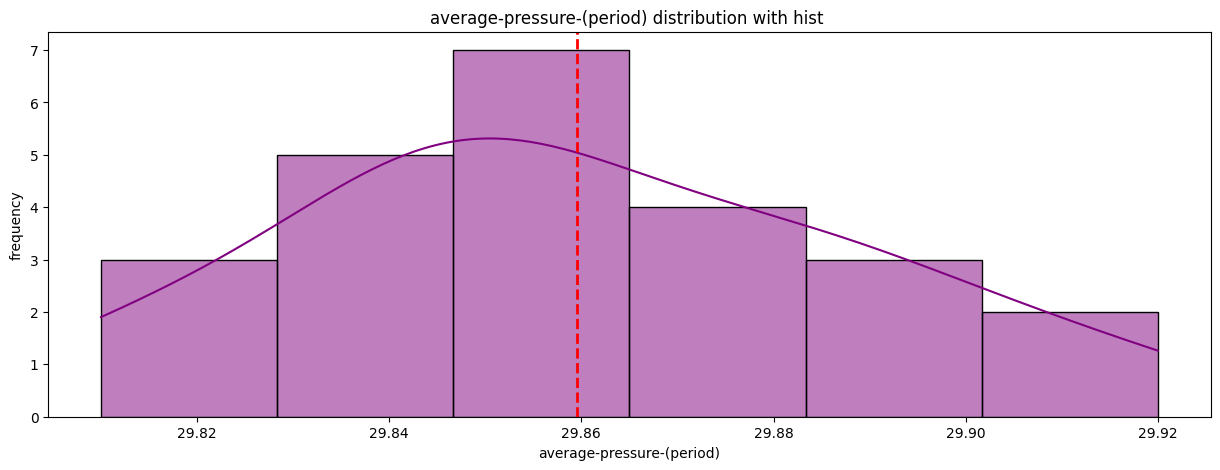

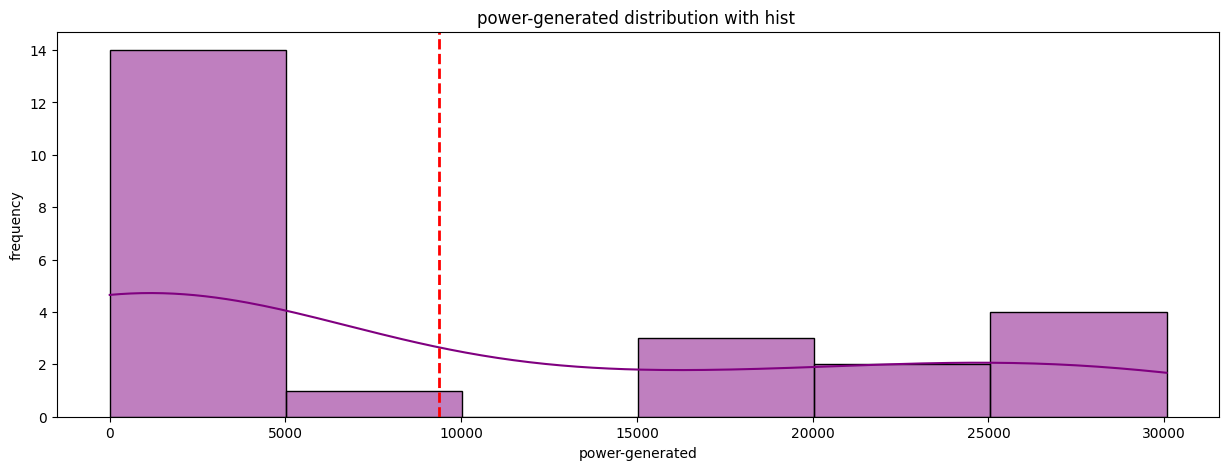

In [10]:
for num in numerical_columns:
    plot_hist(num)

In [11]:
def df_analysis(data,x):
    df=data.copy()
    df_analysis = pd.DataFrame(data[x].mean(axis=0), columns = ['mean'])
    df_analysis['min']  = data[x].min(axis=0)
    df_analysis['max']  = data[x].max(axis=0)
    df_analysis['std']  = data[x].std(axis=0)
    df_analysis['med']  = data[x].median(axis=0)
    df_analysis['nunique']  = data[x].nunique(axis=0)
    df_analysis['nulls'] = data[x].isnull().sum()
    df_analysis['zeros'] = (data[x] == 0).astype(int).sum(axis=0)
    df_analysis['null_ratio'] = df_analysis['nulls'] / len(df)
    df_analysis['zero_ratio'] = df_analysis['zeros'] / len(df)
    return df_analysis

In [12]:
df_analysis(solar_data_new,solar_data_new.columns)

,mean,min,max,std,med,nunique,nulls,zeros,null_ratio,zero_ratio
distance-to-solar-noon,0.464120,0.065553,0.865459,0.269966,0.464009,24,0,0,0.0,0.000
temperature,71.333333,69.000000,73.000000,1.736229,72.000000,3,0,0,0.0,0.000
wind-direction,28.666667,28.000000,29.000000,0.481543,29.000000,2,0,0,0.0,0.000
wind-speed,7.400000,6.800000,7.900000,0.464384,7.500000,3,0,0,0.0,0.000
sky-cover,0.000000,0.000000,0.000000,0.000000,0.000000,1,0,24,0.0,1.000
visibility,10.000000,10.000000,10.000000,0.000000,10.000000,1,0,0,0.0,0.000
humidity,53.041667,20.000000,78.000000,20.070483,58.500000,20,0,0,0.0,0.000
average-wind-speed-(period),7.250000,0.000000,23.000000,6.680601,6.000000,13,0,6,0.0,0.250
average-pressure-(period),29.859583,29.810000,29.920000,0.029706,29.855000,12,0,0,0.0,0.000
power-generated,9365.333333,0.000000,30069.000000,11552.904140,2684.500000,16,0,9,0.0,0.375


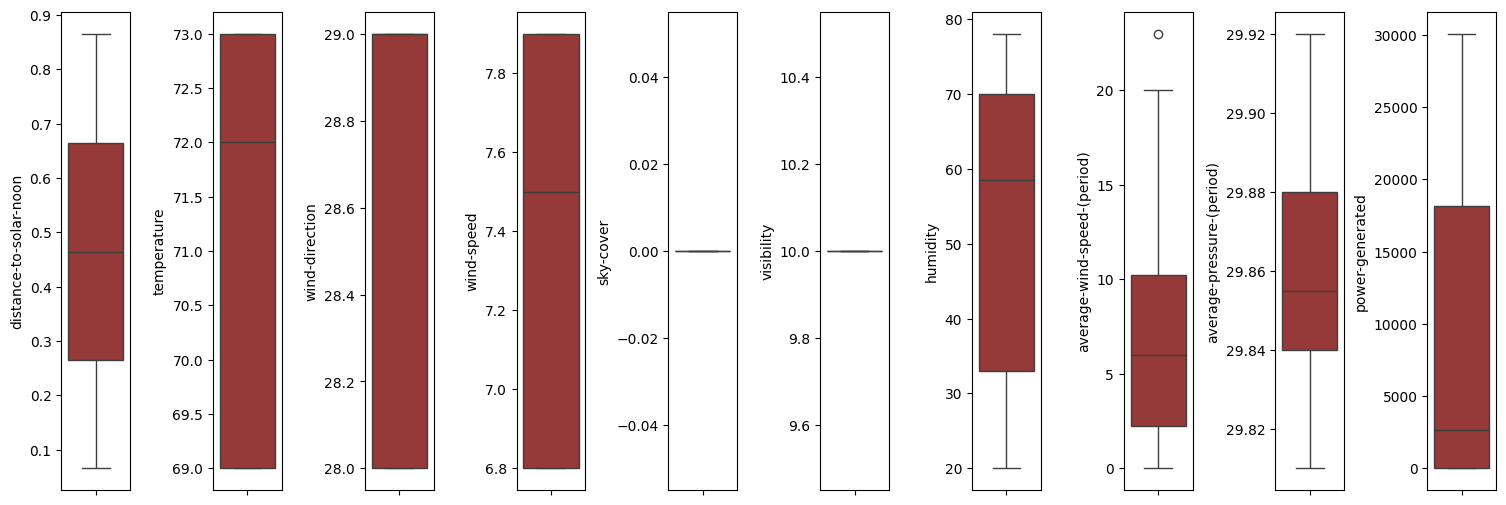

In [13]:
numerical = solar_data_new[['distance-to-solar-noon','temperature','wind-direction','wind-speed','sky-cover','visibility','humidity','average-wind-speed-(period)','average-pressure-(period)','power-generated']]
fig,axis=plt.subplots(ncols=10,nrows=1,figsize=(15,5))
index=0
axis=axis.flatten()

for col,values in numerical.items():
    sns.boxplot(y=col,data=numerical,color='Brown',ax=axis[index])
    index+=1
plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=5.0)

In [14]:
upper_limit = solar_data_new[['distance-to-solar-noon','temperature','wind-direction','wind-speed','sky-cover','visibility','humidity','average-wind-speed-(period)','average-pressure-(period)','power-generated']].quantile(0.90)
upper_limit
 
lower_limit = solar_data_new[['distance-to-solar-noon','temperature','wind-direction','wind-speed','sky-cover','visibility','humidity','average-wind-speed-(period)','average-pressure-(period)','power-generated']].quantile(0.10)
lower_limit

distance-to-solar-noon          0.095927
temperature                    69.000000
wind-direction                 28.000000
wind-speed                      6.800000
sky-cover                       0.000000
visibility                     10.000000
humidity                       24.200000
average-wind-speed-(period)     0.000000
average-pressure-(period)      29.823000
power-generated                 0.000000
Name: 0.1, dtype: float64

In [15]:
solar_data_final = solar_data_new[['distance-to-solar-noon','temperature','wind-direction','wind-speed','sky-cover','visibility','humidity','average-wind-speed-(period)','average-pressure-(period)','power-generated']]
solar_data_final.head()

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
0,0.859897,69,28,7.5,0,10.0,75,8.0,29.82,0
1,0.628535,69,28,7.5,0,10.0,77,5.0,29.85,0
2,0.397172,69,28,7.5,0,10.0,70,0.0,29.89,5418
3,0.165810,69,28,7.5,0,10.0,33,0.0,29.91,25477
4,0.065553,69,28,7.5,0,10.0,21,3.0,29.89,30069


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'distance-to-solar-noon'),
  Text(1, 0, 'temperature'),
  Text(2, 0, 'wind-direction'),
  Text(3, 0, 'wind-speed'),
  Text(4, 0, 'sky-cover'),
  Text(5, 0, 'visibility'),
  Text(6, 0, 'humidity'),
  Text(7, 0, 'average-wind-speed-(period)'),
  Text(8, 0, 'average-pressure-(period)'),
  Text(9, 0, 'power-generated')])

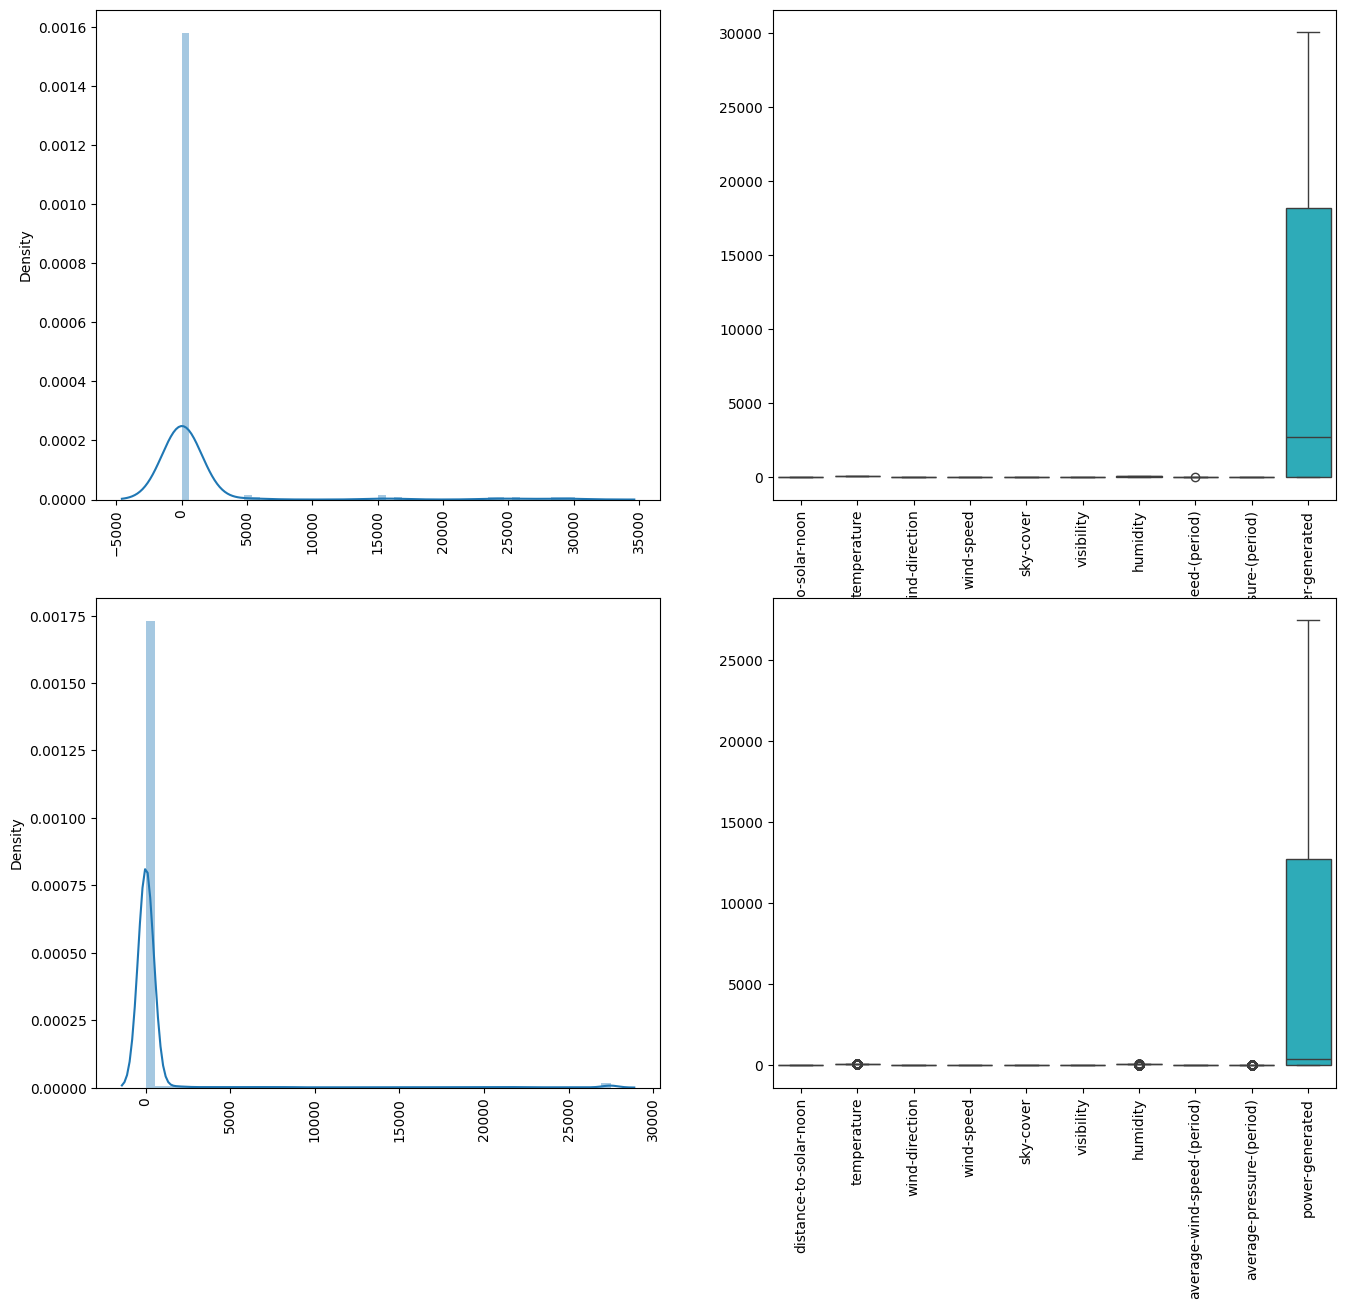

In [16]:
new_solar_cap = solar_data.copy()
new_solar_cap[['distance-to-solar-noon','temperature','wind-direction','wind-speed','sky-cover','visibility','humidity','average-wind-speed-(period)','average-pressure-(period)','power-generated']] = np.where(
    new_solar_cap[['distance-to-solar-noon','temperature','wind-direction','wind-speed','sky-cover','visibility','humidity','average-wind-speed-(period)','average-pressure-(period)','power-generated']] > upper_limit, upper_limit,
    np.where(new_solar_cap[['distance-to-solar-noon','temperature','wind-direction','wind-speed','sky-cover','visibility','humidity','average-wind-speed-(period)','average-pressure-(period)','power-generated']] < lower_limit, lower_limit,
             new_solar_cap[['distance-to-solar-noon','temperature','wind-direction','wind-speed','sky-cover','visibility','humidity','average-wind-speed-(period)','average-pressure-(period)','power-generated']]))
 
# Comparing
plt.figure(figsize=(16,14))
plt.subplot(2,2,1)
sns.distplot(solar_data_final[['distance-to-solar-noon','temperature','wind-direction','wind-speed','sky-cover','visibility','humidity','average-wind-speed-(period)','average-pressure-(period)','power-generated']])
plt.xticks(rotation=90)
plt.subplot(2,2,2)
sns.boxplot(solar_data_final[['distance-to-solar-noon','temperature','wind-direction','wind-speed','sky-cover','visibility','humidity','average-wind-speed-(period)','average-pressure-(period)','power-generated']])
plt.xticks(rotation=90)
plt.subplot(2,2,3)
sns.distplot(new_solar_cap[['distance-to-solar-noon','temperature','wind-direction','wind-speed','sky-cover','visibility','humidity','average-wind-speed-(period)','average-pressure-(period)','power-generated']])
plt.xticks(rotation=90)
plt.subplot(2,2,4)
sns.boxplot(new_solar_cap[['distance-to-solar-noon','temperature','wind-direction','wind-speed','sky-cover','visibility','humidity','average-wind-speed-(period)','average-pressure-(period)','power-generated']]);
plt.xticks(rotation=90)

In [17]:
X = solar_data_final.drop(['power-generated'],axis=1)
y = solar_data_final['power-generated']

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=21)

In [19]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(19, 9)
(5, 9)
(19,)
(5,)


In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import PoissonRegressor
from sklearn.linear_model import GammaRegressor
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import LassoLarsIC
from sklearn.linear_model import LassoLarsCV
from sklearn.linear_model import Lars
from sklearn.linear_model import LarsCV
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import TweedieRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import OrthogonalMatchingPursuitCV
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.linear_model import OrthogonalMatchingPursuit
from sklearn.linear_model import LassoLars
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.svm import SVR
from sklearn.svm import NuSVR
from sklearn.svm import LinearSVR
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
import xgboost as xgb

In [22]:
models = []

names = [
    "LinearRegression",
    "HuberRegressor",
    "RidgeCV",
    "BayesianRidge",
    "Ridge",
    "ElasticNetCV",
    "LassoCV",
    "LassoLarsIC",
    "LassoLarsCV",
    "Lars",
    "LarsCV",
    "TweedieRegressor",
    "ElasticNet",
    "Lasso",
    "OrthogonalMatchingPursuitCV",
    "PassiveAggressiveRegressor",
    "OrthogonalMatchingPursuit",
    "DecisionTreeRegressor",
    "ExtraTreeRegressor",
    "LinearSVR",
    "BaggingRegressor",
    "RandomForestRegressor",
    "GradientBoostingRegressor",
    "ExtraTreesRegressor",
    "AdaBoostRegressor",
    "HistGradientBoostingRegressor",
    "KNeighborsRegressor",
    "MLPRegressor",
    "xgb.XGBRegressor"
]

scores = []

clf = [
    LinearRegression(),
    HuberRegressor(),
    RidgeCV(),
    BayesianRidge(),
    Ridge(),
    ElasticNetCV(),
    LassoCV(),
    LassoLarsIC(criterion='bic'),
    LassoLarsCV(),
    Lars(n_nonzero_coefs=1),
    LarsCV(),
    TweedieRegressor(),
    ElasticNet(),
    Lasso(alpha=0.1),
    OrthogonalMatchingPursuitCV(),
    PassiveAggressiveRegressor(),
    OrthogonalMatchingPursuit(),
    DecisionTreeRegressor(),
    ExtraTreeRegressor(),
    LinearSVR(),
    BaggingRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    ExtraTreesRegressor(),
    AdaBoostRegressor(),
    HistGradientBoostingRegressor(),
    KNeighborsRegressor(),
    MLPRegressor(),
    xgb.XGBRegressor(verbosity=0)
]

In [23]:
for model in clf:
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    scores.append(score)
 
final_scores = pd.DataFrame(zip(names,scores), columns=['Classifier', 'Accuracy'])

final_scores.sort_values(by='Accuracy',ascending=False).style.background_gradient(cmap="tab10").set_properties(**{
            'font-family': 'Comic Sans MS',
            'color': 'Brown',
            'font-size': '15px'
        })

,Classifier,Accuracy
23,ExtraTreesRegressor,0.998074
17,DecisionTreeRegressor,0.996834
24,AdaBoostRegressor,0.996834
22,GradientBoostingRegressor,0.996628
20,BaggingRegressor,0.993267
21,RandomForestRegressor,0.943443
1,HuberRegressor,0.934809
13,Lasso,0.934085
0,LinearRegression,0.934024
4,Ridge,0.929995


In [24]:
from sklearn import metrics

def print_evaluate(true, predicted, train=True):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    if train:
        print("========Training Result=======")
        print('MAE: ', mae)
        print('MSE: ', mse)
        print('RMSE: ', rmse)
        print('R2 Square: ', r2_square)
    elif not train:
        print("=========Testing Result=======")
        print('MAE: ', mae)
        print('MSE: ', mse)
        print('RMSE: ', rmse)
        print('R2 Square: ', r2_square)

In [25]:
for model in clf:
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    print(f"\033[035m\033[1m{model}\n")
    print_evaluate(y_train, y_train_pred, train=True)
    print_evaluate(y_test, y_test_pred, train=False)

LinearRegression()

========Training Result=======
MAE:  4542.401703835365
MSE:  24776839.899694335
RMSE:  4977.633966021842
R2 Square:  0.8263060254332383
=========Testing Result=======
MAE:  1492.9809255459
MSE:  3979900.2303765663
RMSE:  1994.968729172607
R2 Square:  0.9340243768841956
HuberRegressor()

========Training Result=======
MAE:  4409.23919678013
MSE:  25510097.656605087
RMSE:  5050.7521872098505
R2 Square:  0.8211656421278875
=========Testing Result=======
MAE:  1295.5014615599373
MSE:  3932540.0012953924
RMSE:  1983.063287264275
R2 Square:  0.9348094771238169
RidgeCV()

========Training Result=======
MAE:  4547.464998650367
MSE:  25108521.460697167
RMSE:  5010.840394654091
R2 Square:  0.8239808262208157
=========Testing Result=======
MAE:  1741.6744568265603
MSE:  4222981.266044414
RMSE:  2054.989359107344
R2 Square:  0.9299947726560756
BayesianRidge()

========Training Result=======
MAE:  4616.175753548709
MSE:  26061526.344622396
RMSE:  5105.049103056933
R2 Square:  0.

In [26]:
print(f"\033[035m\033[1m")
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print_evaluate(y_train, y_train_pred, train=True)
print_evaluate(y_test, y_test_pred, train=False)


========Training Result=======
MAE:  0.0012869210424564937
MSE:  5.18798595076502e-06
RMSE:  0.002277715072340046
R2 Square:  1.0
=========Testing Result=======
MAE:  3289.1391351625616
MSE:  25718196.08018078
RMSE:  5071.311080990869
R2 Square:  0.5736641883850098


In [27]:
from sklearn.ensemble import HistGradientBoostingRegressor
gbr = HistGradientBoostingRegressor(learning_rate=0.03,max_depth=5,random_state=42)
gbr.fit(X_train,y_train)
prediction = gbr.predict(X_test)
print(prediction)

[10162.10526316 10162.10526316 10162.10526316 10162.10526316
 10162.10526316]


In [28]:
cross_checking = pd.DataFrame({'Actual' : y_test , 'Predicted' : prediction})
cross_checking.head()

,Actual,Predicted
1,0,10162.105263
17,0,10162.105263
13,15408,10162.105263
5,16280,10162.105263
7,0,10162.105263


In [29]:
cross_checking['Error'] = cross_checking['Actual'] - cross_checking['Predicted']
cross_checking.head()

,Actual,Predicted,Error
1,0,10162.105263,-10162.105263
17,0,10162.105263,-10162.105263
13,15408,10162.105263,5245.894737
5,16280,10162.105263,6117.894737
7,0,10162.105263,-10162.105263
